In [1]:
import pennylane as qml
import pennylane.numpy as np
import numpy as illegal_but_typed_np
from numpy.typing import NDArray

## 1. Set up circuit to optimize

In [2]:
from circuits import sim_01, sim_02, sim_03, sim_04, sim_05

import uuid

num_layers = 5
num_qubits = 4

# circuit_name = "sim01"
# circuit = sim_01(num_layers, num_qubits)
# initial_params = (
#     np.array(np.random.random((num_layers, num_qubits, 2))),
#     np.array([])
# )

# circuit_name = "sim02"
# circuit = sim_02(num_layers, num_qubits)
# initial_params = (
#     np.array(np.random.random((num_layers, num_qubits, 2))),
#     np.array([])
# )

circuit_name = "sim03"
circuit = sim_03(num_layers, num_qubits)
initial_params = (
    np.array(np.random.random((num_layers, num_qubits, 2))),
    np.array(np.random.random((num_layers, num_qubits - 1)))
)

# circuit_name = "sim04"
# circuit = sim_04(num_layers, num_qubits)
# initial_params = (
#     np.array(np.random.random((num_layers, num_qubits, 2))),
#     np.array(np.random.random((num_layers, num_qubits - 1)))
# )

# circuit_name = "sim05"
# circuit = sim_05(num_layers, num_qubits)
# initial_params = (
#     np.array(np.random.random((num_layers, num_qubits, 4))),
#     np.array(np.random.random((num_layers, num_qubits, num_qubits - 1)))
# )

instance_uuid = uuid.uuid4()
print(qml.draw(circuit)(*initial_params))

# demo circuit from Rotosolve docs, crotosolve cannot solve this
# dev = qml.device('default.qubit', wires=3, shots=None)
# @qml.qnode(dev)
# def circuit(rot_param: NDArray, layer_param: float, crot_param: NDArray):
#     for i, par in enumerate(rot_param):
#         qml.RX(par, wires=i)
#     for w in dev.wires:
#         qml.RX(layer_param, wires=w)
#     for i, par in enumerate(crot_param):
#         qml.CRY(par, wires=[i, (i+1) % 3])
#     return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1) @ qml.PauliZ(2))
# params = (
#     np.array([0.3, 0.2, 0.67], requires_grad=True),
#     np.array(1.1, requires_grad=True),
#     np.array([-0.2, 0.1, -2.5], requires_grad=True)
# )

0: ──RX(0.99)──RZ(0.63)─────────────────────╭RZ(0.18)──||──RX(0.83)──RZ(0.90)────────────────────
1: ──RX(0.93)──RZ(0.59)───────────╭RZ(0.21)─╰●─────────||──RX(0.07)──RZ(0.88)───────────╭RZ(0.08)
2: ──RX(0.08)──RZ(0.58)─╭RZ(0.05)─╰●───────────────────||──RX(0.91)──RZ(0.42)─╭RZ(0.17)─╰●───────
3: ──RX(0.85)──RZ(0.92)─╰●─────────────────────────────||──RX(0.57)──RZ(0.25)─╰●─────────────────

──╭RZ(0.54)──||──RX(0.86)──RZ(0.76)─────────────────────╭RZ(0.27)──||──RX(0.64)──RZ(0.30)──────────
──╰●─────────||──RX(0.17)──RZ(0.41)───────────╭RZ(0.51)─╰●─────────||──RX(0.28)──RZ(0.90)──────────
─────────────||──RX(0.67)──RZ(0.14)─╭RZ(0.52)─╰●───────────────────||──RX(0.49)──RZ(0.31)─╭RZ(0.55)
─────────────||──RX(0.69)──RZ(0.03)─╰●─────────────────────────────||──RX(0.94)──RZ(0.73)─╰●───────

────────────╭RZ(0.58)──||──RX(0.93)──RZ(0.77)─────────────────────╭RZ(0.26)──||─┤  <Z>
──╭RZ(0.14)─╰●─────────||──RX(0.43)──RZ(0.67)───────────╭RZ(0.31)─╰●─────────||─┤     
──╰●───────────────────||──RX(0.

## 2. Run optimizations

In [3]:
from optimizers import (
    OptimizationTask,
    OptimizationResult,
    optimizers
)

task = OptimizationTask(circuit=circuit, initial_params=initial_params)

results: dict[str, OptimizationResult] = {}
for name, optimize in optimizers:
    print(f"Optimizing with {name}...")
    result = optimize(task)
    results[name] = result

Optimizing with Crotosolve...
yodl
yodl
yodl
yodl
yodl
yodl
yodl
yodl
yodl
Optimizing with Rotosolve...
Optimizing with Gradient Descent...
0 0.8544020330069699
20 0.6747123110145248
40 0.24344085456436132
60 -0.32123373121841714
80 -0.6986824633911628
100 -0.8717894328422593
120 -0.9418233395667804
Optimizing with Adam...
0 0.8343925984809548
20 -0.004813387355008469
40 -0.7092069204379716
60 -0.9662198268271279
80 -0.9999144261532228
100 -0.9995087608930742
120 -0.9999675164715903
Optimizing with Adagrad...
0 0.8343946086376476
20 0.5550131039507983
40 0.35935640623162024
60 0.20265830494160958
80 0.0734748209862181
100 -0.03468083864097493
120 -0.12649053808948885


## 3. Plot loss curve

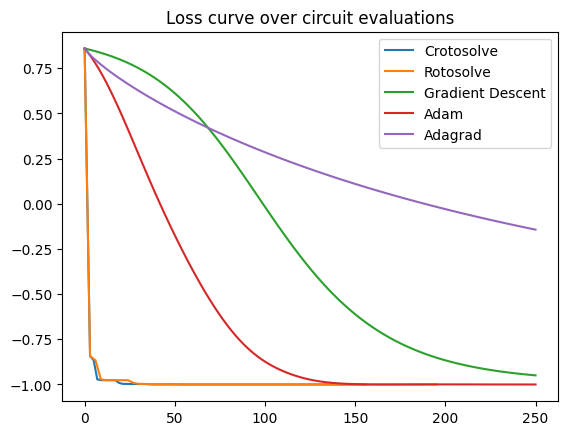

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title("Loss curve over circuit evaluations")

for optimizer_name, result in results.items():
    x, y = zip(*result.loss) # this unzips the list of points

    ax.plot(x, y, label=f"{optimizer_name}")
    ax.legend()

## 4. Save data to disk

In [5]:
import pickle
from dataset import Instance

instance = Instance(
    circuit_name=circuit_name,
    num_qubits=num_qubits,
    num_layers=num_layers,
    initial_params=initial_params,
    results=results,
)

file = f"../dataset/{circuit_name}_results_{instance_uuid}.pickle"

pickle.dump(results, open(file, "wb"))

# results = pickle.load(open(file, "rb"))